In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
df_dsa.shape

(9700, 11)

In [4]:
# Amostra dos dados
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [5]:
# Amostra dos dados
df_dsa.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


## Análise Exploratória

In [6]:
# Colunas do conjunto de dados
df_dsa.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [7]:
# Verificando o tipo de dado de cada coluna
df_dsa.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [8]:
# Resumo estatístico da coluna com o valor de venda
df_dsa['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [9]:
# Verificando se há registros duplicados
df_dsa[df_dsa.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [10]:
# Verificando de há valores ausentes
df_dsa.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [11]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680



### Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

###### Passos para resolver

1 - Selecionar a cidade e o valor_vendas apenas os produtos da categoria Office Supplies


2 - Agrupar por cidades


3 - Somar o Valor_Vendas de cada cidade


4 - Descobrir qual é o maior

In [12]:
#Primeiro selecionar apenas os produtos da categoria "Office Supplies"

dfOS = df_dsa[df_dsa.Categoria == 'Office Supplies']


In [13]:
# Fazendo um slicing apenas da cidade e do Valor_Vendas e a usando o metodo sum para somar o Valor_Venda de cada cidade

dfOS_sum = dfOS[['Cidade', 'Valor_Venda']].groupby('Cidade').sum()

In [14]:
# Descobrindo o valor máximo 
dfOS_sum.max()

Valor_Venda    68362.814
dtype: float64

In [15]:
dfOS_sum.query('Valor_Venda == 68362.814')

,Valor_Venda
Cidade,
New York City,68362.814


#### Dessa forma a cidade com o maior Valor_Vendas na categoria Office Supplies é a cidade de New York City

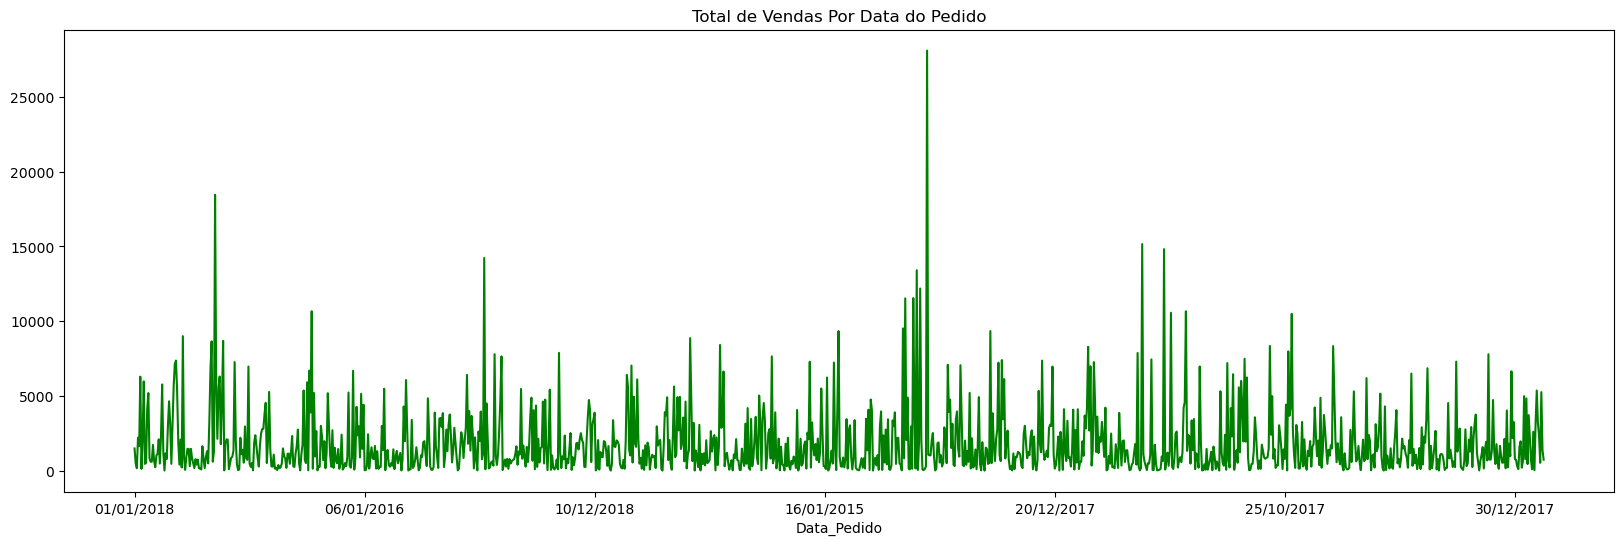

In [76]:
plt.figure(figsize = (20, 6))
df2.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()


### Qual o Total de Vendas por Estado?

Demonstre o resultado através de um gráfico de barras.

In [145]:
df3 = df_dsa.groupby('Estado')['Valor_Venda'].sum()

In [146]:
estado = df3.index

In [147]:
valor = []
for i in range(49):
    valor.append(df3[i])

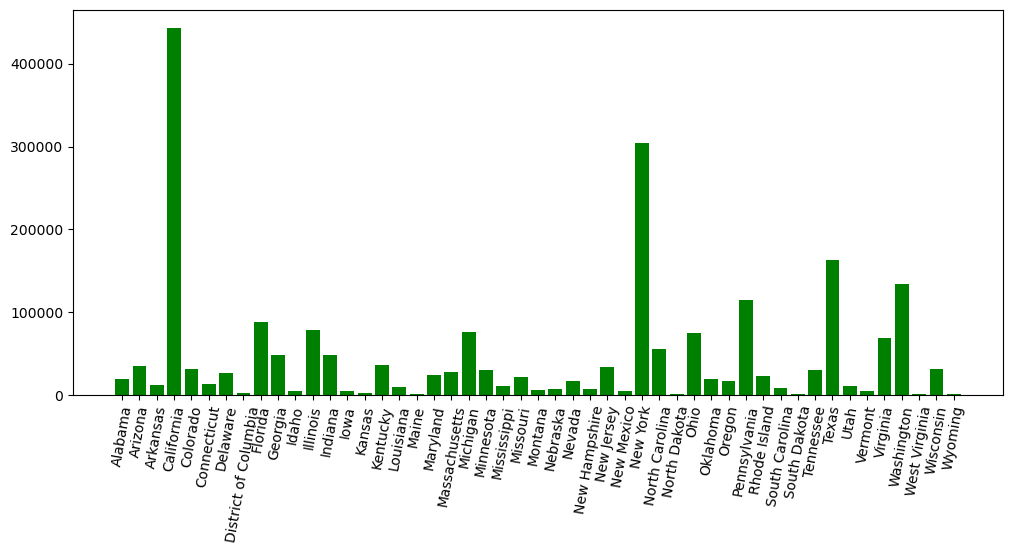

In [148]:
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(estado, valor, color='green')
plt.xticks(rotation = 80)
width_n = 1.75 
plt.show()


### Quais São as 10 Cidades com Maior Total de Vendas?

Demonstre o resultado através de um gráfico de barras.

In [181]:
df4 = df_dsa.groupby('Cidade')['Valor_Venda'].sum()

In [182]:
df4.head()

Cidade
Aberdeen         25.500
Abilene           1.392
Akron          2724.244
Albuquerque    2220.160
Alexandria     5519.570
Name: Valor_Venda, dtype: float64

In [184]:
valor = []
for i in range(528):
    valor.append(df4[i])

In [192]:
valor_ordenado = sorted(valor, reverse=True)

In [193]:
MaioresValores = []

for i in range(0,10):
    MaioresValores.append(valor_ordenado[i])

In [206]:
MaioresCidades = []
for i in range(10):
    for j in range(528):
        if Maiores[i] == df4[j]:
            MaioresCidades.append(df4.index[j])

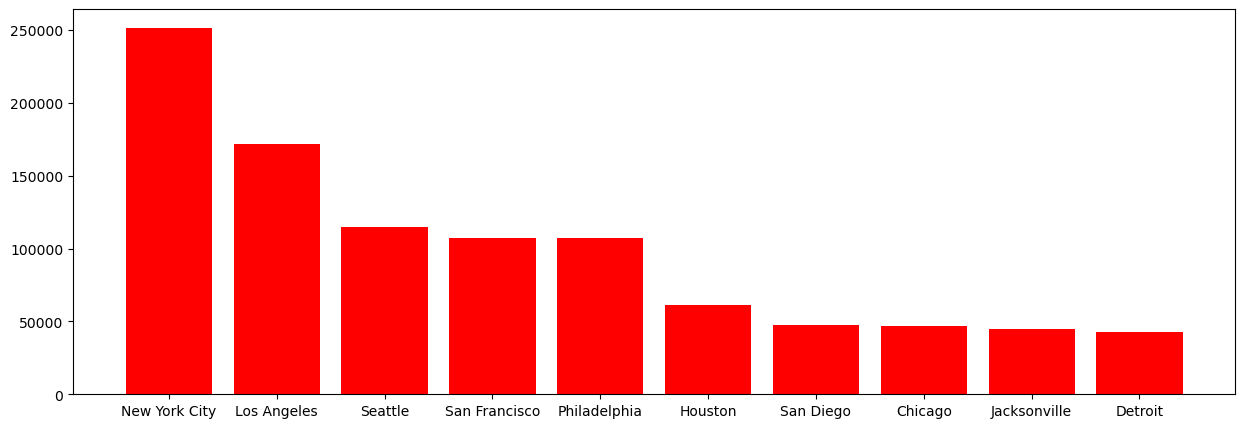

In [207]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(MaioresCidades, MaioresValores, color='red')
plt.show()


### Qual Segmento Teve o Maior Total de Vendas?

Demonstre o resultado através de um gráfico de pizza.

In [208]:
df5 = df_dsa.groupby('Segmento')['Valor_Venda'].sum()

In [212]:
df5.head()

Segmento
Consumer       1.133834e+06
Corporate      6.792322e+05
Home Office    4.224914e+05
Name: Valor_Venda, dtype: float64

In [225]:
sizes = []

for i in range(len(df5)):
    sizes.append(df5[i])

In [226]:
sizes

[1133834.335, 679232.1868, 422491.4329]

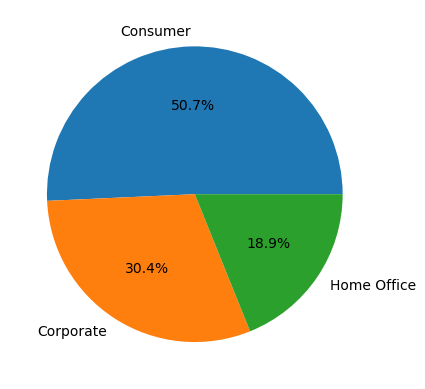

In [231]:
labels = df5.index

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.show()


### Qual o Total de Vendas Por Segmento e Por Ano?

In [4]:
dfData = df_dsa['Data_Pedido']

In [7]:
ano = dfData[0].split('/')

In [8]:
ano[2]

'2017'

In [9]:
ano = []
for i in range(len(dfData)):
    sepData = dfData[i].split('/')
    ano.append(sepData[2])

In [19]:
set(ano) #

{'2015', '2016', '2017', '2018'}

In [42]:
df_dsa['Ano'] = ano

In [43]:
df_dsa.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016


In [44]:
teste = df_dsa.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [49]:
teste.index[0]

('2015', 'Consumer')

In [ ]:
species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()


Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:

- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

### Quantas Vendas Receberiam 15% de Desconto?

In [4]:
df7 = df_dsa.query('Valor_Venda > 1000')

In [6]:
len(df7)

457

457 Vendas receberiam 15% de desconto



### Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [14]:
df_dsa.Valor_Venda.mean()

245.42939489072165

In [36]:


valor_venda15 = []

for i in range(len(df_dsa.Valor_Venda)):
    if (df_dsa.Valor_Venda[i] > 1000):
        desconto = df_dsa.Valor_Venda[i] - (df_dsa.Valor_Venda[i] * 0.15)
        valor_venda15.append(desconto)
    else:
        valor_venda15.append(df_dsa.Valor_Venda[i])

In [37]:
valor_vendaArray = np.array(valor_venda15)

In [38]:
valor_vendaArray.mean()

228.22596683907216